In [94]:
from tensorflow.keras.datasets import cifar10
(x_train , y_train) ,(x_test , y_test)=cifar10.load_data()

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output


# making the target variable continuous by tweaking with the target variables (y_train and y_test)

In [96]:
for i in range(len(y_train)):
    y_train[i][0]= np.random.randint(10 * y_train[i][0], (10* y_train[i][0])+10)
    
    
for i in range(len(y_test)):
    y_test[i][0]= np.random.randint(10 * y_test[i][0], (10* y_test[i][0])+10)
    
    


# flatteing the image dataset from (50000,32,32,3)  into (50000,  32*32*3)

In [97]:
x_flat=[]
for i in range(len(x_train)):
    x_flat.append(np.ndarray.flatten(x_train[i])) 
    
x_train=np.array(x_flat)   

x_flat=[]
for i in range(len(y_test)):
    x_flat.append(np.ndarray.flatten(x_test[i]))     
    
x_test=np.array(x_flat)



In [98]:
x_test.shape

(10000, 3072)

# **coding multivariate linear regression**

In [99]:
weights0=np.random.randn(x_train.shape[1],1)
bias0=np.random.randn(1,1)

In [100]:
def linear_model(m,x,c):
    return np.matmul(x,m)+c

def error(m,x,c,y):
    return np.mean((linear_model(m,x,x)-y)**2)/100

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*np.mean(np.multiply(x,linear_model(m,x,c)-y),axis=0)
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(x_train.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y):
    derivative=2*np.mean(linear_model(m,x,c)-y)
    derivative= np.array(derivative)
    derivative=derivative.reshape(1,1)
    return derivative

def scalar(x):
    return (x-np.mean(x))/np.std(x)

def accuracy(m,x,c,y):
    currentError = error(m,x,c,y)
    maxError = np.mean(y**2)
    return (1-(currentError / maxError))*100

In [101]:
def model_result(alpha,num_of_iteration):
    weights=weights0
    bias=bias0
    error_cost=[]
    for i in range(num_of_iteration):
        weights = weights - alpha * derivative_wrt_weights(weights,x_train,bias,y_train)
        bias = bias - alpha * derivative_wrt_bias(weights,x_train,bias,y_train)
        error_cost.append(error(weights,x_train,bias,y_train))
    plt.plot(error_cost)
    print("Accuracy is: ",accuracy(weights,x_train,bias,y_train))
    print("Error is: ",error(weights,x_train,bias,y_train))

In [102]:
x_train=scalar(x_train)
x_test=scalar(x_test)
y_train=scalar(y_train)
y_test=scalar(y_test)

Accuracy is:  -2968.783336881619
Error is:  30.68783336881619


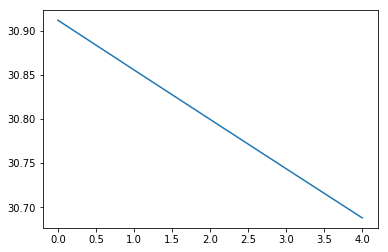

In [103]:
model_result(.000001,5)